Demonstration: backpropagate the ReLU function for a single neuron and act as if we
intend to minimize the output for this single neuron

In [2]:
import numpy as np
import nnfs

x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights of this neuron
b = 1.0 # bias of this neuron

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0, xw1, xw2)

-3.0 2.0 6.0


The next operation to perform is a sum of all weighted inputs with a bias.

In [5]:
z = xw0 + xw1 + xw2 + b
z

6.0

Then, applu ReLU activation.

In [13]:
def relu(x):
    return np.max(x, 0)

y = relu(z)
y

6.0

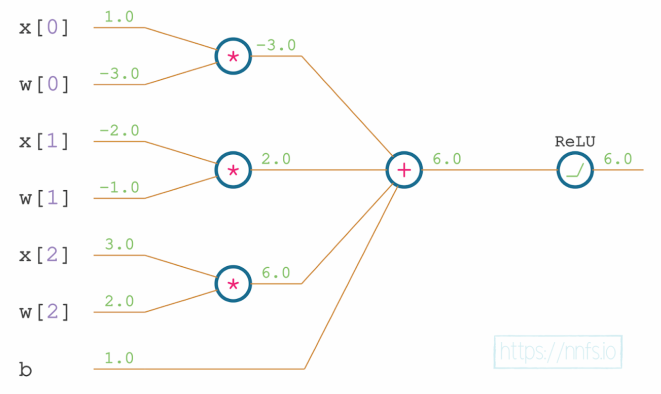

Let’s treat
all of these chained functions as one big function which takes input values (​x​), weights (​w)​ , and
bias (​b​), as inputs, and outputs ​y.​

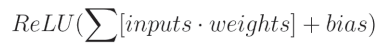

Which is equal to: 

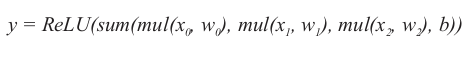

To calculate the impact of the example weight, ​w​0,​ on
the output, the chain rule tells us to 
1. calculate the derivative of ​ReLU​ with respect to its parameter,
which is the sum, 
2. then multiply it with the partial derivative of the sum operation with respect to
its ​mul(x​0,​ w​0)​ ​ input, as this input contains the parameter in question. 
3. Then, multiply this with the
partial derivative of the multiplication operation with respect to the ​x​0​ input. 

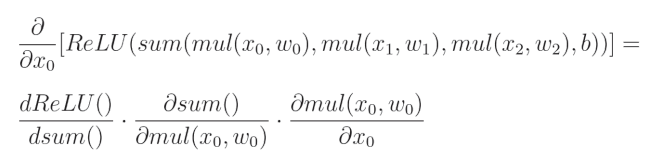